In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mn
import seaborn as sns
from scipy.interpolate import interp1d
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import ExpSineSquared as ES, RationalQuadratic as RQ
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 10,6

In [7]:
cs = ['#56d870', '#f9ee4a', '#44d9ff', '#f95b4a', '#3d9fe2', '#ffa847', '#c4ef7a', '#e195e2', '#ced9ed', '#fff29b']

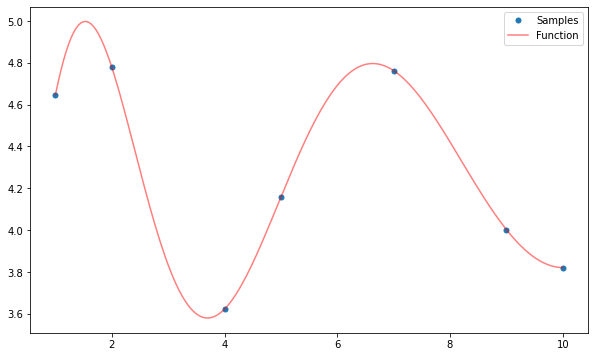

In [14]:
def fn(xs):
    return np.exp((xs + 10.5)**0.1) + np.sin(xs) / (xs + 1) + np.cos(2.5 * xs**0.5)**2

xs = np.array([1,2,4,5,7,9,10])
ys = fn(xs)
x_fine = np.linspace(1,10,200)
y_fine = fn(x_fine)

plt.plot(xs, ys, 'o', label='Samples', markersize=5)
plt.plot(x_fine, y_fine, label='Function', color='red', alpha=0.5, linestyle='-')
plt.legend();

In [59]:
ys

array([4.64715596, 4.77888498, 3.62263281, 4.15800015, 4.76267233,
       4.00289926, 3.82075553])

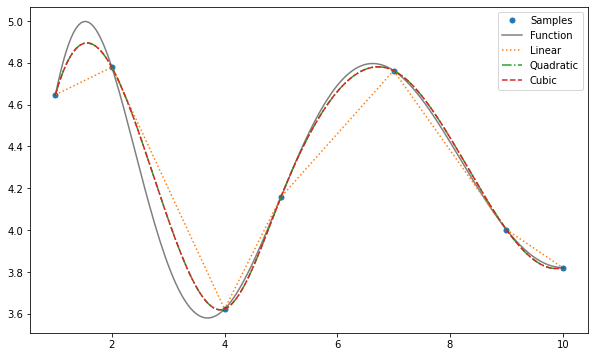

In [19]:
y_linear = interp1d(xs, ys, kind='linear')(x_fine)
y_quad = interp1d(xs, ys, kind='cubic')(x_fine)
y_cubic = interp1d(xs, ys, kind='cubic')(x_fine)

plt.plot(xs, ys, 'o', label='Samples', markersize=5)
plt.plot(x_fine, y_fine, label='Function', color='black', alpha=0.5, linestyle='-')
plt.plot(x_fine, y_linear, label='Linear', ls=':')
plt.plot(x_fine, y_quad, label='Quadratic', ls='dashdot')
plt.plot(x_fine, y_cubic, label='Cubic', ls='--')
plt.legend();

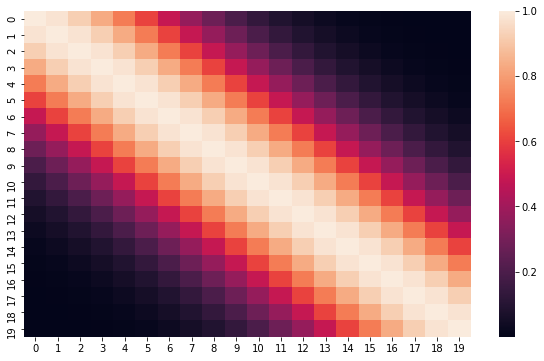

In [26]:
x = np.arange(20)
lenght = 50 
cov = np.exp(-(1 / lenght) * (x - np.atleast_2d(x).T)**2)
sns.heatmap(cov);

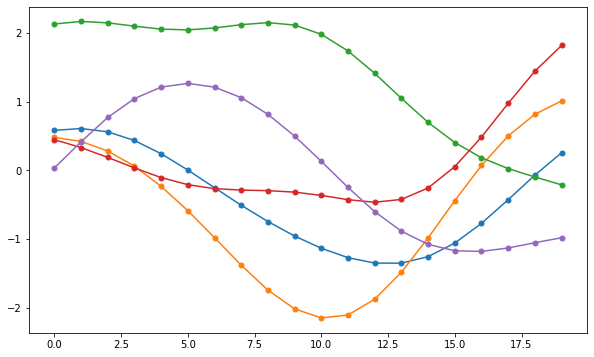

In [29]:
for i in range(5):
    rvs = mn.rvs(cov=cov)
    plt.plot(x, rvs, '-o', ms=5)

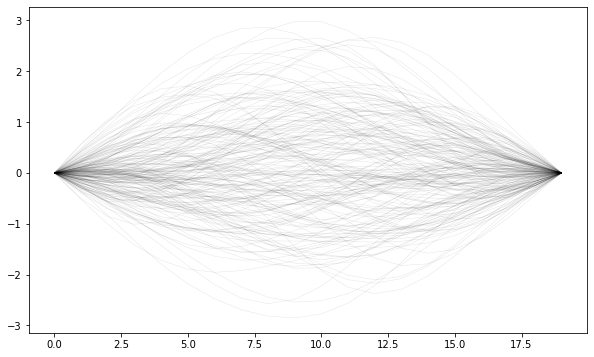

In [36]:
rvs = mn.rvs(cov=cov, size=200)
rvs -= np.linspace(rvs[:,0], rvs[:,-1], x.size).T

for i in range(200):
    plt.plot(x, rvs[i, :], ls='-', c='black', lw=0.5, alpha=0.1)

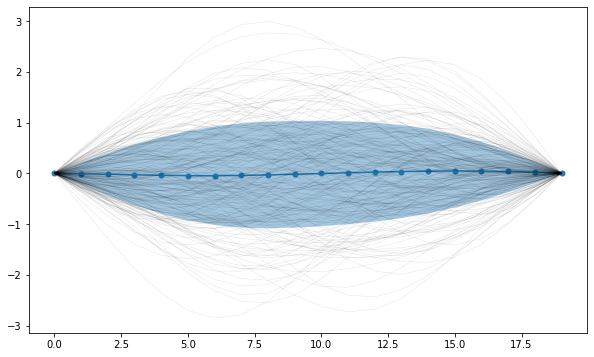

In [37]:
rvs = mn.rvs(cov=cov, size=200)
rvs -= np.linspace(rvs[:,0], rvs[:,-1], x.size).T

mean = rvs.mean(axis=0)
std = rvs.std(axis=0)

plt.plot(x, mean, 'o-', ms=5)
plt.fill_between(x, mean + std, mean - std, alpha = 0.4)

for i in range(200):
    plt.plot(x, rvs[i, :], ls='-', c='black', lw=0.5, alpha=0.1)

In [38]:
mean

array([ 0.        , -0.00762221, -0.01819559, -0.03012436, -0.04069864,
       -0.04721743, -0.04796827, -0.04268936, -0.03243176, -0.0190025 ,
       -0.00430609,  0.01011697,  0.02319749,  0.03412774,  0.04203258,
        0.04577395,  0.04406089,  0.03585717,  0.02089304,  0.        ])

In [41]:
std

array([0.        , 0.21349036, 0.41342551, 0.59505993, 0.75249789,
       0.87925356, 0.97063877, 1.02623378, 1.05067367, 1.05201904,
       1.03818541, 1.0131146 , 0.97501937, 0.91787456, 0.83492592,
       0.72187758, 0.57829061, 0.40705348, 0.212714  , 0.        ])

In [47]:
xs

array([ 1,  2,  4,  5,  7,  9, 10])

In [48]:
np.atleast_2d(xs)

array([[ 1,  2,  4,  5,  7,  9, 10]])

In [49]:
np.atleast_2d(xs).T

array([[ 1],
       [ 2],
       [ 4],
       [ 5],
       [ 7],
       [ 9],
       [10]])

In [50]:
x_fine[:, None]

array([[ 1.        ],
       [ 1.04522613],
       [ 1.09045226],
       [ 1.13567839],
       [ 1.18090452],
       [ 1.22613065],
       [ 1.27135678],
       [ 1.31658291],
       [ 1.36180905],
       [ 1.40703518],
       [ 1.45226131],
       [ 1.49748744],
       [ 1.54271357],
       [ 1.5879397 ],
       [ 1.63316583],
       [ 1.67839196],
       [ 1.72361809],
       [ 1.76884422],
       [ 1.81407035],
       [ 1.85929648],
       [ 1.90452261],
       [ 1.94974874],
       [ 1.99497487],
       [ 2.04020101],
       [ 2.08542714],
       [ 2.13065327],
       [ 2.1758794 ],
       [ 2.22110553],
       [ 2.26633166],
       [ 2.31155779],
       [ 2.35678392],
       [ 2.40201005],
       [ 2.44723618],
       [ 2.49246231],
       [ 2.53768844],
       [ 2.58291457],
       [ 2.6281407 ],
       [ 2.67336683],
       [ 2.71859296],
       [ 2.7638191 ],
       [ 2.80904523],
       [ 2.85427136],
       [ 2.89949749],
       [ 2.94472362],
       [ 2.98994975],
       [ 3

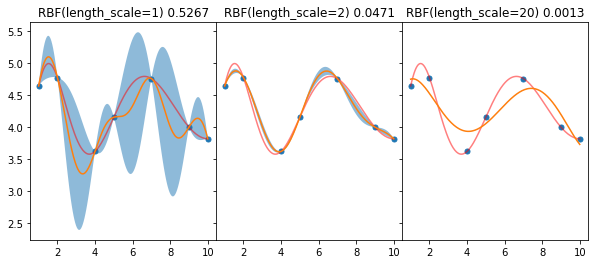

In [53]:
kernels = [
    RBF(length_scale=1.0, length_scale_bounds=(1.0,1.01)),
    RBF(length_scale=2.0, length_scale_bounds=(2.0,2.01)),
    RBF(length_scale=20.0, length_scale_bounds=(20.0,20.01))    
]

fig, axes = plt.subplots(figsize = (10, 4), ncols = len(kernels), sharey= True)
fig.subplots_adjust(wspace = 0, hspace = 0)

for k,ax in zip(kernels, axes):
    gp = GaussianProcessRegressor(kernel=k)
    gp.fit(np.atleast_2d(xs).T, ys)
#                                                                         np.atleast_2d(xs).T = x_fine[:, None] same functionality
    y_mean, y_std = gp.predict(x_fine[:, None], return_std=True)
    
    ax.plot(xs, ys, 'o', label='Samples', markersize=5)
    ax.plot(x_fine, y_fine, label='Function', color='red', alpha=0.5, linestyle='-')
    ax.plot(x_fine, y_mean)
    ax.fill_between(x_fine, y_mean + 2 * y_std, y_mean - 2 * y_std, alpha=0.5)
    ax.set_title(str(k) + f" {y_std.max():.4f}")

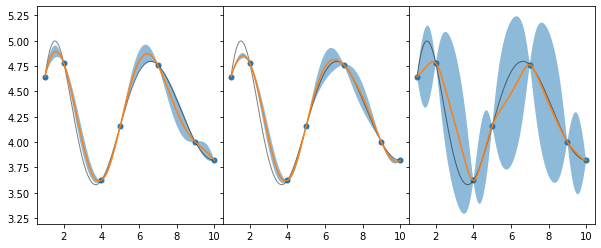

In [54]:
kernels = [
    C() * RBF(), 
    ES(periodicity=10),
    C() * RQ() + RBF()
]

fig, axes = plt.subplots(figsize=(10, 4), ncols=len(kernels), sharey=True)
fig.subplots_adjust(wspace=0, hspace=0)

for k, ax in zip(kernels, axes):
    gp = GaussianProcessRegressor(kernel=k)
    gp.fit(np.atleast_2d(xs).T, ys)
    
    y_mean, y_std = gp.predict(x_fine[:, None], return_std=True)

    ax.plot(xs, ys, 'o', label="Samples", markersize=5)
    ax.plot(x_fine, y_fine, label="Function", color="k", ls="-", lw=1, alpha=0.5)
    ax.plot(x_fine, y_mean)
    ax.fill_between(x_fine, y_mean + 2 * y_std, y_mean - 2 * y_std, alpha=0.5)


In [57]:
kernels

[1**2 * RBF(length_scale=1),
 ExpSineSquared(length_scale=1, periodicity=10),
 1**2 * RationalQuadratic(alpha=1, length_scale=1) + RBF(length_scale=1)]

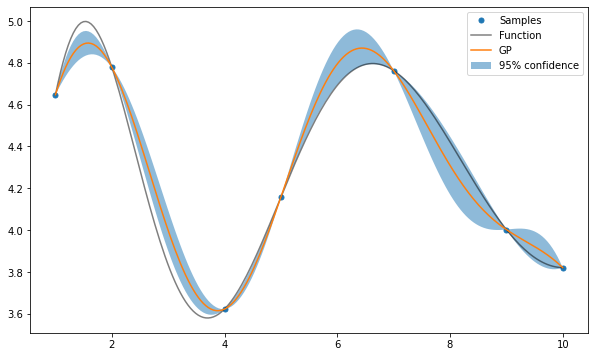

In [58]:
gp = GaussianProcessRegressor(kernel=C() * RBF())
gp.fit(np.atleast_2d(xs).T, ys)
y_pred, sigma = gp.predict(x_fine[:, None], return_std=True)

upper, lower = y_pred + 1.96 * sigma, y_pred - 1.96 * sigma

plt.plot(xs, ys, 'o', label="Samples", markersize=5)
plt.plot(x_fine, y_fine, label="Function", color="k", ls="-", alpha=0.5)
plt.plot(x_fine, y_pred, label="GP")
plt.fill_between(x_fine, upper, lower, alpha=0.5, label="95% confidence")
plt.legend();

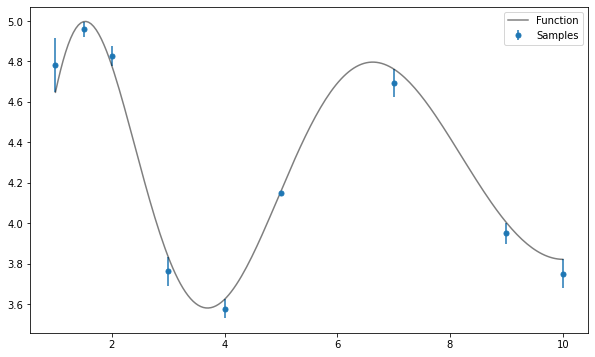

In [60]:
xs2 = np.array([1, 1.5, 2, 3, 4, 5, 7, 9, 10])
ys2 = fn(xs2)

err_scale = np.random.uniform(low=0.03, high=0.1, size=ys2.shape)
err = np.random.normal(loc=0, scale=err_scale, size=ys2.shape)
ys_err =  ys2 + err

plt.errorbar(xs2, ys_err, yerr=err, fmt='o', label='Samples', markersize=5)
plt.plot(x_fine, y_fine, label="Function", color="k", alpha=0.5, linestyle="-")
plt.legend();

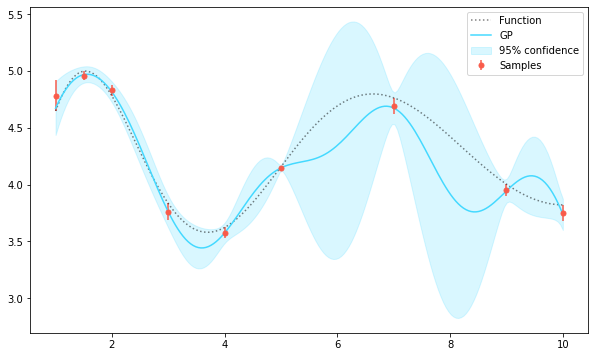

In [61]:
gp = GaussianProcessRegressor(alpha=err**2)
gp.fit(np.atleast_2d(xs2).T, ys_err)
y_pred, sigma = gp.predict(np.atleast_2d(x_fine).T, return_std=True)

upper, lower = y_pred + 1.96 * sigma, y_pred - 1.96 * sigma

plt.errorbar(xs2, ys_err, yerr=err, fmt="o", label="Samples", color="#f95b4a", markersize=5)
plt.plot(x_fine, y_fine, label="Function", color="k", ls=":", alpha=0.5)
plt.plot(x_fine, y_pred, label="GP", color="#44d9ff", ls="-")
plt.fill_between(x_fine, upper, lower, alpha=0.2, color="#44d9ff", label="95% confidence")
plt.legend();